### Intern Name : Sanket Alurkar

### Intern ID : IP-5981 

### Domain : Machine Learning

### Task 2 : To Predict Placement Status of students using various parameters.

### 1. Importing necessary modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### 2. Reading the data using pandas

In [ ]:
train_data = pd.read_excel('01 Train Data.xlsx')

In [ ]:
train_data.head()

In [ ]:
train_data.info()

### It's clear that there are total 4894 rows and 23 columns in the training dataset.


### Some columns contain missing or null values.

### Such missing or null values need to be eliminated before training our model because they can create an issue in our prediction model's performance.


### Also there are some columns like 'Price Tier' and 'Group' which have no values in their rows, so they should be removed before dropping the null rows from the training data set.

### 3. Dropping Blank columns ('Price Tier' and 'Group') and creating a new training dataset named 'train_df'

In [ ]:
train_df = train_data.copy()

In [ ]:
train_df.head()

In [ ]:
columns = ['Price Tier', 'Group']
train_df = train_df.drop(columns, axis=1)

In [ ]:
train_df.info()

### 4. Dropping rows based in duplicates found in 'Email ID' column of the dataset

In [ ]:
train_df['Email ID'].value_counts()

In [ ]:
duplicates = train_df[train_df.duplicated(subset='Email ID', keep=False)]

In [ ]:
duplicates

In [ ]:
# Remove duplicates and keep only the first occurrence
cleaned_df = train_df.drop_duplicates(subset='Email ID', keep='first')

In [ ]:
cleaned_df

In [ ]:
cleaned_df.info()

In [ ]:
cleaned_df.describe()

In [ ]:
cleaned_df.Quantity.value_counts()

In [ ]:
cleaned_df['Ticket Type'].value_counts()

In [ ]:
cleaned_df['Order Type'].value_counts()

In [ ]:
cleaned_df['Currency'].value_counts()

In [ ]:
cleaned_df['Total Paid'].value_counts()

In [ ]:
cleaned_df['Fees Paid'].value_counts()

In [ ]:
cleaned_df['Eventbrite Fees'].value_counts()

In [ ]:
cleaned_df['Eventbrite Payment Processing'].value_counts()

In [ ]:
cleaned_df['Attendee Status'].value_counts()

### After Cleaning the dataset for Duplicates in 'Mail ID' column
##### Let's drop some redundant columns which is not required for training our ML model
##### The following columns are being dropped: 
##### Quantity
##### Attendee #
##### Order Type
##### Currency
##### Total Paid
##### Fees Paid
##### Eventbrite Fees
##### Eventbrite Payment Processing
##### Attendee Status

In [ ]:
columns = ['Quantity','Attendee #','Order Type','Currency','Total Paid','Fees Paid','Eventbrite Fees',
           'Eventbrite Payment Processing','Attendee Status']
cleaned_df = cleaned_df.drop(columns, axis=1)

In [ ]:
cleaned_df.info()

In [ ]:
cleaned_df['Ticket Type'].value_counts()

In [ ]:
cleaned_df['College Name'].value_counts()

In [ ]:
cleaned_df['Designation'].value_counts()

In [ ]:
cleaned_df['Year of Graduation'].value_counts()

##### There are columns like 'How did you come to know about this event?' and 'Specify in "Others" (how did you come to know about this event)' which be merged together to form a new column 'Source of Event Information'

In [ ]:
cleaned_df['Source of Event Information'] = cleaned_df['How did you come to know about this event?'] + " " + cleaned_df['Specify in "Others" (how did you come to know about this event)'].fillna('')

In [ ]:
cleaned_df.head()

##### Dropping columns ''How did you come to know about this event?" and 'Specify in "Others" (how did you come to know about this event)' after concatenating them into a new column

In [ ]:
columns = ['How did you come to know about this event?','Specify in "Others" (how did you come to know about this event)']
cleaned_df = cleaned_df.drop(columns, axis=1)

In [ ]:
cleaned_df.head()

In [ ]:
cleaned_df.info()

In [72]:
cleaned_df['First Name'].value_counts()

First Name
ANIKET        1
Rahulsing     1
Daneshwari    1
Kausar        1
Sonica        1
             ..
Nishant       1
Arti          1
Barkha        1
Dhruvika      1
UTkarsha      1
Name: count, Length: 1987, dtype: int64

In [73]:
cleaned_df['Email ID'].value_counts()

Email ID
aniket@xyz.com        1
rahulsing@xyz.com     1
daneshwari@xyz.com    1
kausar@xyz.com        1
sonica@xyz.com        1
                     ..
nishant@xyz.com       1
arti@xyz.com          1
barkha@xyz.com        1
dhruvika@xyz.com      1
utkarsha@xyz.com      1
Name: count, Length: 1987, dtype: int64

### 6. Visualizing the cleaned data for finding some useful analytics using the 'Plotly' library

In [74]:
cleaned_df['Ticket Type'].value_counts()

Ticket Type
Internship Program(IP) Success Conclave        339
Art of Resume Building                         337
Product Design & Full Stack                    258
Data Visualization using Power BI              222
Hello ML and DL                                115
Talk on Skill and Employability Enhancement    109
IS DATA SCIENCE FOR YOU?                       101
KYC - Know Your CCPC                            73
Skill and Employability Enhancement             71
IAC - Q&A                                       67
Artificial Intelligence                         62
Product Marketing                               62
The SDLC & their transformations                52
The Agile Ways of Working                       51
Transformation with DevOps: The Easy Way        44
RPA: A Boon or A Bane                           24
Name: count, dtype: int64

In [ ]:
ticket_type = cleaned_df['Ticket Type'].value_counts().keys()
count = cleaned_df['Ticket Type'].value_counts().values

labels = [str(val) for val in count]
fig = px.bar(x=ticket_type, y=count, text=labels, title='Count of each Ticket Type', template='plotly', color_discrete_sequence=['darkviolet'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='Count')
fig.update_xaxes(title_text='Ticket Type')

# Show the plot
fig.show()


In [ ]:
cleaned_df['College Name'].value_counts()

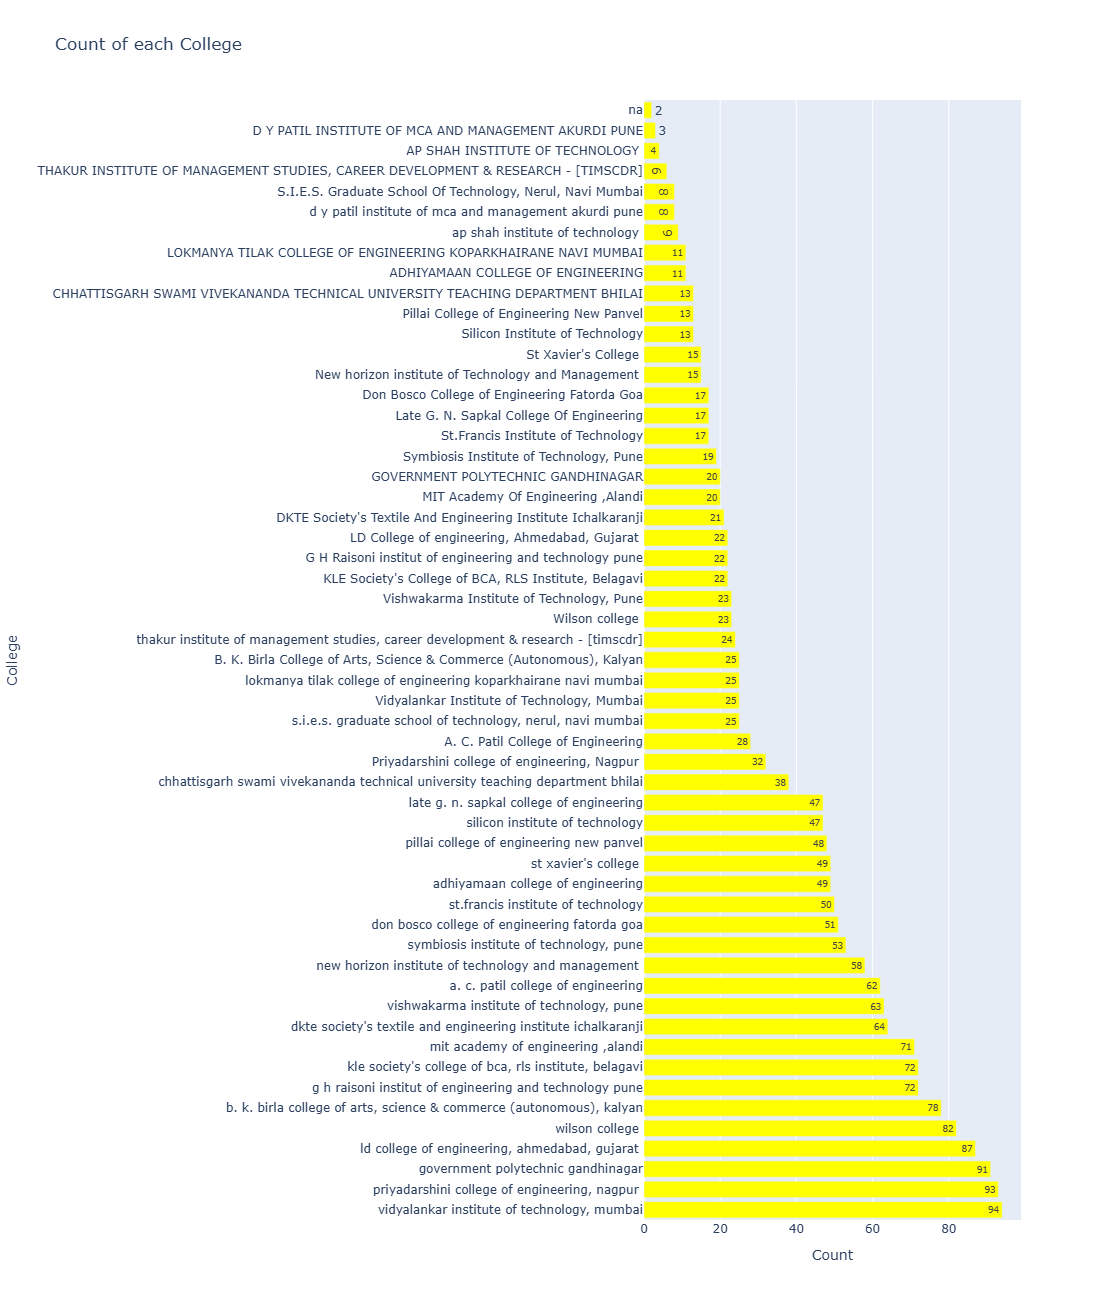

In [69]:
college = cleaned_df['College Name'].value_counts().keys()
count = cleaned_df['College Name'].value_counts().values
labels = [str(val) for val in count]

fig = px.bar(y=college, x=count, text=labels, title='Count of each College', template='plotly', color_discrete_sequence=['yellow'])

# Set the labels for the y-axis and x-axis
fig.update_xaxes(title_text='Count')
fig.update_yaxes(title_text='College')

fig.update_layout(width=1000, height=1300)

# Show the plot
fig.show()

In [70]:
cleaned_df['Designation'].value_counts()

Designation
Students                    1847
Intern                        28
Asst. Professor               17
Engineering                   14
Data Science and Analyst      13
HoD                            9
Computer Engineer              9
B.Tech                         4
CSE                            4
Artificial intelligence        3
IT                             3
Professor                      3
Web Development                3
BE IT                          3
Civil Engineering              3
Principal                      3
Mechanical Engineer            2
Software Engineer              2
BE CS                          2
IT Engineering                 1
MTech                          1
Research Scholar               1
Computer applications          1
Django                         1
Cyber Security                 1
MCA                            1
PGDM Marketing student         1
SPC                            1
Aerospace engineer             1
Electrical Engineering         

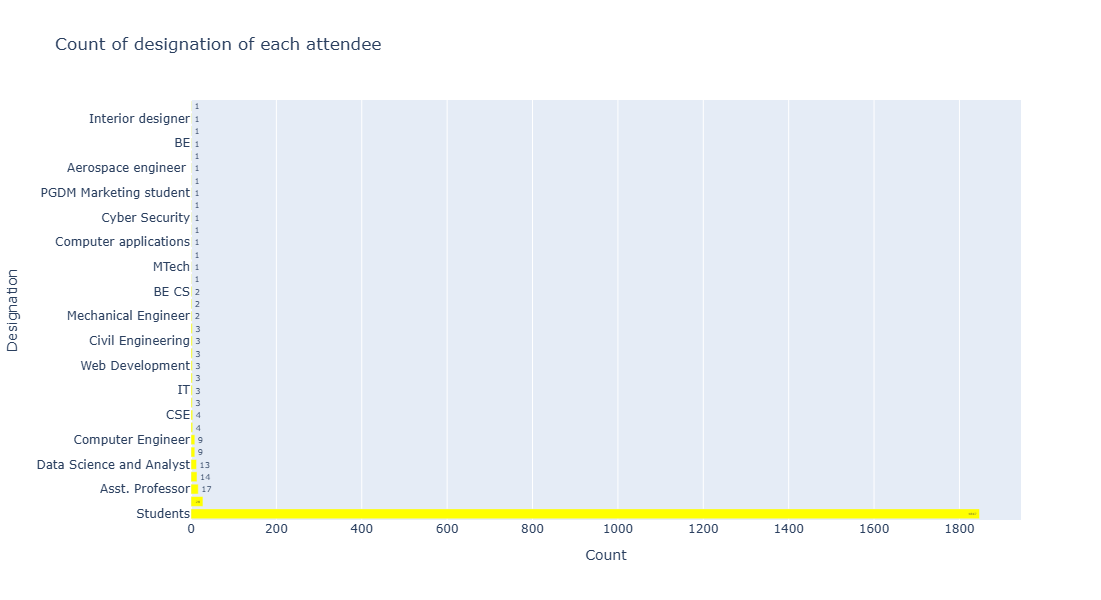

In [76]:
college = cleaned_df['Designation'].value_counts().keys()
count = cleaned_df['Designation'].value_counts().values
labels = [str(val) for val in count]

fig = px.bar(y=college, x=count, text=labels, title='Count of designation of each attendee', template='plotly', color_discrete_sequence=['yellow'])

# Set the labels for the y-axis and x-axis
fig.update_xaxes(title_text='Count')
fig.update_yaxes(title_text='Designation')

fig.update_layout(width=1000, height=600)

# Show the plot
fig.show()

In [77]:
cleaned_df['Year of Graduation'].value_counts()

Year of Graduation
2021                        79
2022                        62
2023                        45
Second year                 32
Third year                  25
2020                        16
Final Year                   5
Fourth Year                  5
Bachelor of Engineering      2
Pursuing                     2
2019                         1
AISSMS                       1
2016                         1
B.Tech                       1
Friend                       1
1999                         1
2024                         1
Name: count, dtype: int64

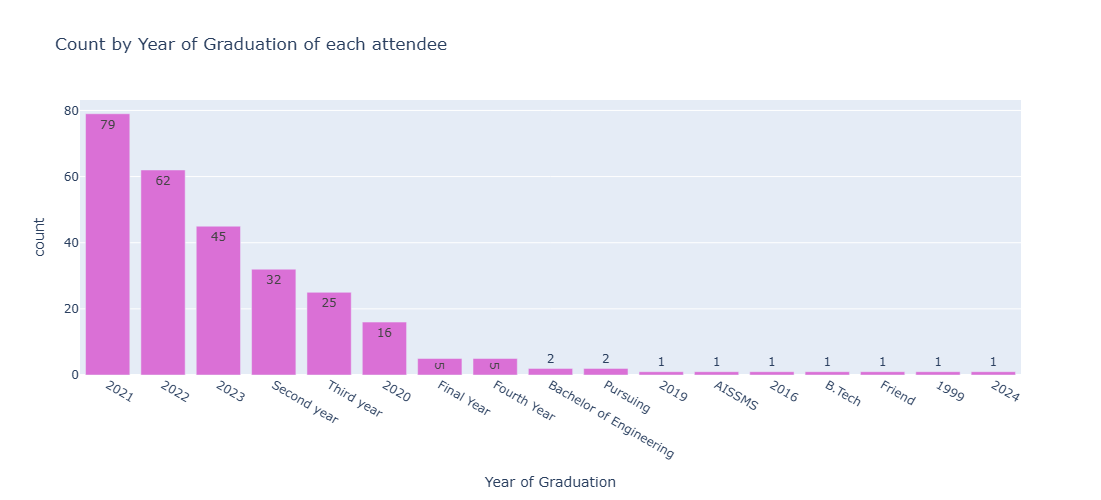

In [78]:
yog = cleaned_df['Year of Graduation'].value_counts().keys()
count = cleaned_df['Year of Graduation'].value_counts().values
labels = [str(val) for val in count]

fig = px.bar(x=yog, y=count, text=labels, title='Count by Year of Graduation of each attendee', template='plotly', color_discrete_sequence=['orchid'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='count')
fig.update_xaxes(title_text='Year of Graduation')

fig.update_layout(width=1000, height=500)

# Show the plot
fig.show()

In [79]:
cleaned_df['Source of Event Information'].value_counts().head(25)

Source of Event Information
Whatsapp                                                    481
Email                                                       229
SPOC/ College Professor                                     127
Cloud Counselage Website                                     58
Others                                                       41
Others College                                               34
LinkedIn                                                     24
Whatsapp | SPOC/ College Professor                           21
Facebook                                                     20
Instagram                                                    19
Youtube                                                      18
Whatsapp | Email                                             15
Friend/ Classmate                                            15
Email | Cloud Counselage Website                             12
Youtube | Whatsapp                                            8
Friend/ Clas

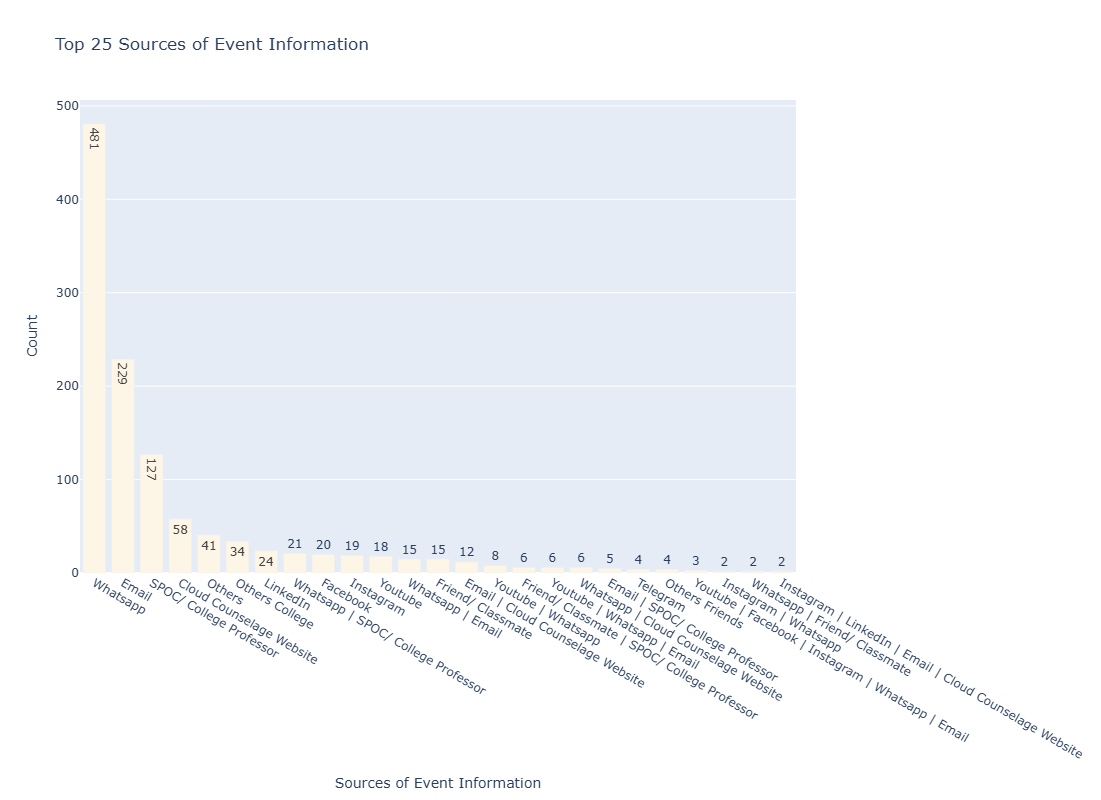

In [81]:
source = cleaned_df['Source of Event Information'].value_counts().head(25).keys()
count = cleaned_df['Source of Event Information'].value_counts().head(25).values
labels = [str(val) for val in count]

fig = px.bar(x=source, y=count, text=labels, title='Top 25 Sources of Event Information', template='plotly', color_discrete_sequence=['oldlace'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='Count')
fig.update_xaxes(title_text='Sources of Event Information')

fig.update_layout(width=1000, height=800)

# Show the plot
fig.show()

In [82]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 4836
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   First Name                   1987 non-null   object 
 1   Email ID                     1987 non-null   object 
 2   Ticket Type                  1987 non-null   object 
 3   College Name                 1977 non-null   object 
 4   Designation                  1987 non-null   object 
 5   Year of Graduation           280 non-null    object 
 6   CGPA                         1987 non-null   float64
 7   Speaking Skills              1987 non-null   int64  
 8   ML Knowledge                 1987 non-null   int64  
 9   Placement Status             666 non-null    object 
 10  Source of Event Information  1222 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 186.3+ KB


### 7. Cleaning and preparing the final training and testing data

In [83]:
columns = ['College Name','CGPA','Speaking Skills','ML Knowledge','Placement Status']
train_data = cleaned_df[columns]

In [84]:
train_data['Placement Status'].value_counts()

Placement Status
Not placed    454
Placed        212
Name: count, dtype: int64

### Label Encode 'Placed' as 1 and 'Not Placed' as 0 and 'Blank' as 2
### Label Encode College Name also

In [86]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()
train_data['Placement Status'] = label_encoder.fit_transform(train_data['Placement Status'])
train_data['College Name'] = label_encoder.fit_transform(train_data['College Name'])

C:\Users\sanket alurkar\AppData\Local\Temp\ipykernel_34448\2427855782.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sanket alurkar\AppData\Local\Temp\ipykernel_34448\2427855782.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [87]:
train_data['Placement Status'] = train_data['Placement Status'].fillna(0)

C:\Users\sanket alurkar\AppData\Local\Temp\ipykernel_34448\34716984.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
train_data.head()

,College Name,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,5,6.7,2,5,1
1,2,8.2,3,2,0
2,7,6.5,4,3,0
3,16,8.7,2,5,0
4,20,9.1,3,5,1


In [89]:
train_data.corr()

,College Name,CGPA,Speaking Skills,ML Knowledge,Placement Status
College Name,1.000000,0.015798,-0.023175,-0.022636,0.389209
CGPA,0.015798,1.000000,0.019610,0.010322,0.016035
Speaking Skills,-0.023175,0.019610,1.000000,0.884473,-0.052706
ML Knowledge,-0.022636,0.010322,0.884473,1.000000,-0.052940
Placement Status,0.389209,0.016035,-0.052706,-0.052940,1.000000


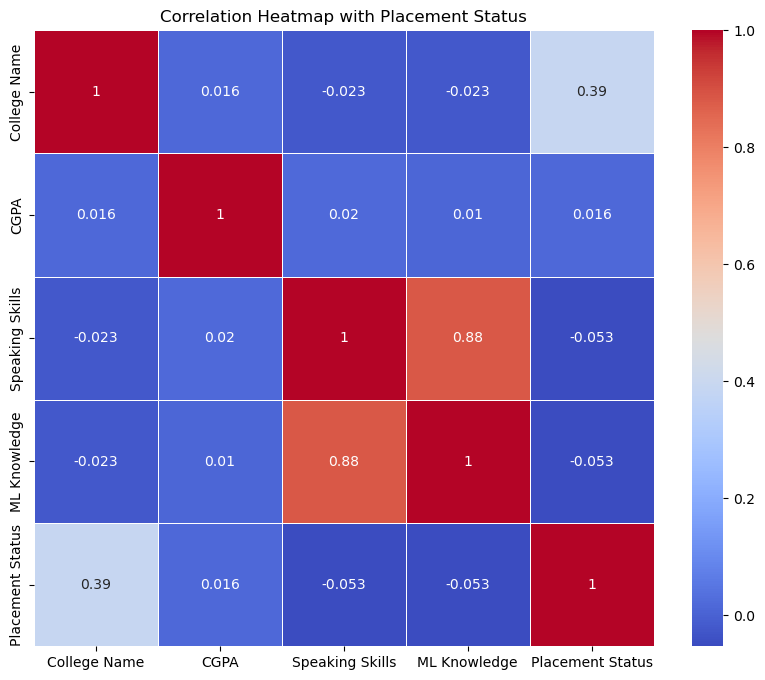

In [90]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap with Placement Status')
plt.show()

In [91]:
train_data.to_excel('Final Cleaned Training Data.xlsx')
train_data.to_csv('Final Cleaned Training Data.csv')

##### We have our final cleaned training data ready!
##### Now, let's prepare our final cleaned testing data.
##### We will be following the given process for creating our final cleaned testing data.

In [94]:
test_df = pd.read_excel('02 Test Data.xlsx')

In [95]:
test_df.head()

,First Name,Email ID,Quantity,Price Tier,Ticket Type,Attendee #,Group,Order Type,Currency,Total Paid,...,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,Sahil,sahil@xyz.com,1,NaN,Hello ML and DL,2.293940e+09,NaN,Free Order,USD,0,...,Attending,"symbiosis institute of technology, pune",Whatsapp,NaN,Students,NaN,7.8,3,3,NaN
1,Amrita,amrita@xyz.com,1,NaN,Hello ML and DL,2.293941e+09,NaN,Free Order,USD,0,...,Attending,"mit academy of engineering ,alandi",Whatsapp,NaN,Students,NaN,9.1,3,3,NaN
2,Mamta,mamta@xyz.com,1,NaN,Hello ML and DL,2.293941e+09,NaN,Free Order,USD,0,...,Attending,a. c. patil college of engineering,Whatsapp,NaN,Students,NaN,6.9,2,2,NaN
3,Bhagyashri,bhagyashri@xyz.com,1,NaN,Hello ML and DL,2.293946e+09,NaN,Free Order,USD,0,...,Attending,wilson college,Others,NaN,Students,NaN,8.4,4,4,NaN
4,Divyanshu,divyanshu@xyz.com,1,NaN,Hello ML and DL,2.293956e+09,NaN,Free Order,USD,0,...,Attending,"ld college of engineering, ahmedabad, gujarat",Whatsapp,NaN,Students,NaN,6.7,5,5,NaN


In [96]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 23 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       3796 non-null   object 
 1   Email ID                                                         3796 non-null   object 
 2   Quantity                                                         3796 non-null   int64  
 3   Price Tier                                                       0 non-null      float64
 4   Ticket Type                                                      3796 non-null   object 
 5   Attendee #                                                       3794 non-null   float64
 6   Group                                                            0 non-null      float64
 7   Order Type                                

#### Let's remove duplicates and redundant data

In [98]:
duplicates = test_df[test_df.duplicated(subset='Email ID', keep=False)]

In [99]:
test_cleaned_df = test_df.drop_duplicates(subset='Email ID', keep='first')

In [100]:
test_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2321 entries, 0 to 3695
Data columns (total 23 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       2321 non-null   object 
 1   Email ID                                                         2321 non-null   object 
 2   Quantity                                                         2321 non-null   int64  
 3   Price Tier                                                       0 non-null      float64
 4   Ticket Type                                                      2321 non-null   object 
 5   Attendee #                                                       2321 non-null   float64
 6   Group                                                            0 non-null      float64
 7   Order Type                                     

In [101]:
columns = ['Quantity','Price Tier','Group','Attendee #','Order Type','Currency','Total Paid','Fees Paid','Eventbrite Fees',
           'Eventbrite Payment Processing','Attendee Status']
test_cleaned_df = test_cleaned_df.drop(columns, axis=1)

In [102]:
test_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2321 entries, 0 to 3695
Data columns (total 12 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       2321 non-null   object 
 1   Email ID                                                         2321 non-null   object 
 2   Ticket Type                                                      2321 non-null   object 
 3   College Name                                                     2320 non-null   object 
 4   How did you come to know about this event?                       815 non-null    object 
 5   Specify in "Others" (how did you come to know about this event)  14 non-null     object 
 6   Designation                                                      2321 non-null   object 
 7   Year of Graduation                             

In [103]:
test_cleaned_df['Source of Event Information'] = test_cleaned_df['How did you come to know about this event?'] + ' ' + test_cleaned_df['Specify in "Others" (how did you come to know about this event)'].fillna('')

In [104]:
columns = ['How did you come to know about this event?','Specify in "Others" (how did you come to know about this event)']
test_cleaned_df = test_cleaned_df.drop(columns, axis=1)

In [105]:
test_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2321 entries, 0 to 3695
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   First Name                   2321 non-null   object 
 1   Email ID                     2321 non-null   object 
 2   Ticket Type                  2321 non-null   object 
 3   College Name                 2320 non-null   object 
 4   Designation                  2321 non-null   object 
 5   Year of Graduation           489 non-null    object 
 6   CGPA                         2321 non-null   float64
 7   Speaking Skills              2321 non-null   int64  
 8   ML Knowledge                 2321 non-null   int64  
 9   Placement Status             0 non-null      float64
 10  Source of Event Information  815 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 217.6+ KB


In [106]:
columns = ['College Name','CGPA','Speaking Skills','ML Knowledge','Placement Status']
test_data = test_cleaned_df[columns]

In [107]:
test_data['College Name'] = label_encoder.fit_transform(test_data['College Name'])

C:\Users\sanket alurkar\AppData\Local\Temp\ipykernel_34448\74914730.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
test_data.head()

,College Name,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,49,7.8,3,3,NaN
1,41,9.1,3,3,NaN
2,27,6.9,2,2,NaN
3,53,8.4,4,4,NaN
4,39,6.7,5,5,NaN


### 8. Preparing training and vaildation datasets using the provided training data

In [109]:
columns = ['College Name','CGPA','Speaking Skills', 'ML Knowledge']
x_train = train_data[columns]

In [110]:
y_train = train_data['Placement Status']

### 9. Training and testing using different Classification and Regression Models

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report

In [117]:
# Split the train data into training and validation sets 
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

### A. Training and testing using RandomForestClassifier

In [119]:
model_1 = RandomForestClassifier(n_estimators=100)
model_1.fit(X_train_split, y_train_split)

RandomForestClassifier()

In [120]:
# Predict on the validation set
y_val_pred_1 = model_1.predict(X_val_split)
print("Validation Accuracy:", accuracy_score(y_val_split, y_val_pred_1))
print("Classification Report:\n", classification_report(y_val_split, y_val_pred_1))

Validation Accuracy: 0.6432160804020101
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.42      0.43        95
           1       0.15      0.11      0.12        47
           2       0.77      0.82      0.79       256

    accuracy                           0.64       398
   macro avg       0.45      0.45      0.45       398
weighted avg       0.62      0.64      0.63       398



### B. Training and testing using LogisticRegression

In [122]:
model_2 = LogisticRegression()
model_2.fit(X_train_split, y_train_split)

C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [123]:
y_val_pred_2 = model_2.predict(X_val_split)
print("Validation Accuracy:", accuracy_score(y_val_split, y_val_pred_2))
print("Classification Report:\n", classification_report(y_val_split, y_val_pred_2))

Validation Accuracy: 0.6984924623115578
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.38      0.46        95
           1       0.00      0.00      0.00        47
           2       0.72      0.95      0.82       256

    accuracy                           0.70       398
   macro avg       0.43      0.44      0.42       398
weighted avg       0.60      0.70      0.64       398



C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### C. Training and Testing using KNeighborsClassifier

In [124]:
model_3 = KNeighborsClassifier()
model_3.fit(X_train_split, y_train_split)

KNeighborsClassifier()

In [125]:
y_val_pred_3 = model_3.predict(X_val_split)
print("Validation Accuracy:", accuracy_score(y_val_split, y_val_pred_3))
print("Classification Report:\n", classification_report(y_val_split, y_val_pred_3))

Validation Accuracy: 0.6708542713567839
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.44      0.45        95
           1       0.10      0.04      0.06        47
           2       0.78      0.87      0.82       256

    accuracy                           0.67       398
   macro avg       0.44      0.45      0.44       398
weighted avg       0.62      0.67      0.64       398



### D. Training and Testing using Support Vector Machine (SVM)

In [127]:
model_4 = SVC()
model_4.fit(X_train_split, y_train_split)

SVC()

In [128]:
y_val_pred_4 = model_4.predict(X_val_split)
print("Validation Accuracy:", accuracy_score(y_val_split, y_val_pred_4))
print("Classification Report:\n", classification_report(y_val_split, y_val_pred_4))

Validation Accuracy: 0.7060301507537688
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.42      0.48        95
           1       0.00      0.00      0.00        47
           2       0.74      0.94      0.83       256

    accuracy                           0.71       398
   macro avg       0.43      0.45      0.44       398
weighted avg       0.61      0.71      0.65       398



C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### E. Training and Testing using DecisionTreeClassifier

In [129]:
model_5 = DecisionTreeClassifier()
model_5.fit(X_train_split, y_train_split)

DecisionTreeClassifier()

In [130]:
y_val_pred_5 = model_5.predict(X_val_split)
print("Validation Accuracy:", accuracy_score(y_val_split, y_val_pred_5))
print("Classification Report:\n", classification_report(y_val_split, y_val_pred_5))

Validation Accuracy: 0.5904522613065326
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.47      0.43        95
           1       0.13      0.13      0.13        47
           2       0.77      0.72      0.74       256

    accuracy                           0.59       398
   macro avg       0.43      0.44      0.44       398
weighted avg       0.60      0.59      0.60       398



### F. Training and Testing using Neural Networks (MLP Classifier)

In [132]:
model_6 =  MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=0)
model_6.fit(X_train_split, y_train_split)

MLPClassifier(max_iter=300, random_state=0)

In [133]:
y_val_pred_6 = model_6.predict(X_val_split)
print("Validation Accuracy:", accuracy_score(y_val_split, y_val_pred_6))
print("Classification Report:\n", classification_report(y_val_split, y_val_pred_6))

Validation Accuracy: 0.7085427135678392
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.41      0.48        95
           1       0.00      0.00      0.00        47
           2       0.73      0.95      0.83       256

    accuracy                           0.71       398
   macro avg       0.44      0.45      0.44       398
weighted avg       0.61      0.71      0.65       398



C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### G. Training and Testing using XGBoost Classifier

In [134]:
model_7 =  XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)
model_7.fit(X_train_split, y_train_split)

C:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning:

[19:29:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [135]:
y_val_pred_7 = model_7.predict(X_val_split)
print("Validation Accuracy:", accuracy_score(y_val_split, y_val_pred_7))
print("Classification Report:\n", classification_report(y_val_split, y_val_pred_7))

Validation Accuracy: 0.6758793969849246
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.39      0.44        95
           1       0.14      0.09      0.11        47
           2       0.77      0.89      0.82       256

    accuracy                           0.68       398
   macro avg       0.47      0.46      0.46       398
weighted avg       0.63      0.68      0.65       398



### H. Training and Testing using GradientBoostingClassifier

In [136]:
model_8 = GradientBoostingClassifier(n_estimators=100, random_state=0)
model_8.fit(X_train_split, y_train_split)

GradientBoostingClassifier(random_state=0)

In [137]:
y_val_pred_8 = model_8.predict(X_val_split)
print("Validation Accuracy:", accuracy_score(y_val_split, y_val_pred_8))
print("Classification Report:\n", classification_report(y_val_split, y_val_pred_8))

Validation Accuracy: 0.6909547738693468
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.37      0.43        95
           1       0.05      0.02      0.03        47
           2       0.77      0.93      0.84       256

    accuracy                           0.69       398
   macro avg       0.45      0.44      0.44       398
weighted avg       0.63      0.69      0.65       398



### I. Training and Testing using AdaBoostClassifier

In [138]:
model_9 = AdaBoostClassifier(n_estimators=100, random_state=0)
model_9.fit(X_train_split, y_train_split)

C:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier(n_estimators=100, random_state=0)

In [139]:
y_val_pred_9 = model_9.predict(X_val_split)
print("Validation Accuracy:", accuracy_score(y_val_split, y_val_pred_9))
print("Classification Report:\n", classification_report(y_val_split, y_val_pred_9))

Validation Accuracy: 0.7412060301507538
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60        95
           1       0.00      0.00      0.00        47
           2       0.80      0.93      0.86       256

    accuracy                           0.74       398
   macro avg       0.47      0.51      0.49       398
weighted avg       0.66      0.74      0.70       398



### J. Training and Testing using Bagging Classifier

In [140]:
model_10 = BaggingClassifier(n_estimators=100, random_state=0)
model_10.fit(X_train_split, y_train_split)

BaggingClassifier(n_estimators=100, random_state=0)

In [141]:
y_val_pred_10 = model_10.predict(X_val_split)
print("Validation Accuracy:", accuracy_score(y_val_split, y_val_pred_10))
print("Classification Report:\n", classification_report(y_val_split, y_val_pred_10))

Validation Accuracy: 0.628140703517588
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.40      0.41        95
           1       0.07      0.04      0.05        47
           2       0.76      0.82      0.79       256

    accuracy                           0.63       398
   macro avg       0.41      0.42      0.42       398
weighted avg       0.59      0.63      0.61       398



### K. Training and Testing using ExtraTrees Classifier

In [143]:
model_11 = ExtraTreesClassifier(n_estimators=100, random_state=0)
model_11.fit(X_train_split, y_train_split)

ExtraTreesClassifier(random_state=0)

In [144]:
y_val_pred_11 = model_11.predict(X_val_split)
print("Validation Accuracy:", accuracy_score(y_val_split, y_val_pred_11))
print("Classification Report:\n", classification_report(y_val_split, y_val_pred_11))

Validation Accuracy: 0.6055276381909548
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.40      0.40        95
           1       0.06      0.04      0.05        47
           2       0.75      0.79      0.77       256

    accuracy                           0.61       398
   macro avg       0.40      0.41      0.41       398
weighted avg       0.58      0.61      0.59       398



### L. Training and Testing using Linear Regression Model

In [145]:
model_12 = LinearRegression()
model_12.fit(X_train_split, y_train_split)

LinearRegression()

In [146]:
y_val_pred_12 = model_12.predict(X_val_split)

In [147]:
print("Validation MSE:", mean_squared_error(y_val_split, y_val_pred_12))
print("Validation R^2 Score: ", r2_score(y_val_split, y_val_pred_12))

Validation MSE: 0.5850991746157537
Validation R^2 Score:  0.1854061044338151


### M. Training and Testing using Ridge Regression Model

In [148]:
model_13 = Ridge()
model_13.fit(X_train_split, y_train_split)

Ridge()

In [149]:
y_val_pred_13 = model_13.predict(X_val_split)
print("Validation MSE:", mean_squared_error(y_val_split, y_val_pred_13))
print("Validation R^2 Score: ", r2_score(y_val_split, y_val_pred_13))

Validation MSE: 0.5850873135632791
Validation R^2 Score:  0.18542261777268132


### N. Training and Testing using Lasso Regression Model

In [151]:
model_14 = Lasso()
model_14.fit(X_train_split, y_train_split)

Lasso()

In [152]:
y_val_pred_14 = model_14.predict(X_val_split)
print("Validation MSE:", mean_squared_error(y_val_split, y_val_pred_14))
print("Validation R^2 Score: ", r2_score(y_val_split, y_val_pred_14))

Validation MSE: 0.5956892987972039
Validation R^2 Score:  0.17066219282744088


### O. Training and Testing using Decision Tree Regression Model

In [153]:
model_15 = DecisionTreeRegressor(random_state=0)
model_15.fit(X_train_split, y_train_split)

DecisionTreeRegressor(random_state=0)

In [154]:
y_val_pred_15 = model_15.predict(X_val_split)
print("Validation MSE:", mean_squared_error(y_val_split, y_val_pred_15))
print("Validation R^2 Score: ", r2_score(y_val_split, y_val_pred_15))

Validation MSE: 1.1364810161920715
Validation R^2 Score:  -0.5822454352715296


### After Training and testing using various Classification and Regression Models we have the following:
### For Classification Models: 

In [155]:
print("\nValidation Accuracy Score for", model_1 ," is " ,accuracy_score(y_val_split, y_val_pred_1))
print("\nValidation Accuracy Score for", model_3 ," is " ,accuracy_score(y_val_split, y_val_pred_3))
print("\nValidation Accuracy Score for", model_4 ," is " ,accuracy_score(y_val_split, y_val_pred_4))
print("\nValidation Accuracy Score for", model_5 ," is " ,accuracy_score(y_val_split, y_val_pred_5))
print("\nValidation Accuracy Score for", model_6 ," is " ,accuracy_score(y_val_split, y_val_pred_6))
print("\nValidation Accuracy Score for", model_7," is ",accuracy_score(y_val_split, y_val_pred_7))
print("\nValidation Accuracy Score for", model_8 ," is ",accuracy_score(y_val_split, y_val_pred_8))
print("\nValidation Accuracy Score for", model_9 ," is ",accuracy_score(y_val_split, y_val_pred_9))
print("\nValidation Accuracy Score for", model_10 ," is ",accuracy_score(y_val_split, y_val_pred_10))
print("\nValidation Accuracy Score for", model_11 ," is ",accuracy_score(y_val_split, y_val_pred_11))


Validation Accuracy Score for RandomForestClassifier()  is  0.6432160804020101

Validation Accuracy Score for KNeighborsClassifier()  is  0.6708542713567839

Validation Accuracy Score for SVC()  is  0.7060301507537688

Validation Accuracy Score for DecisionTreeClassifier()  is  0.5904522613065326

Validation Accuracy Score for MLPClassifier(max_iter=300, random_state=0)  is  0.7085427135678392

Validation Accuracy Score for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None,

### For Regression Models:

In [156]:
print("\nValidation MSE for", model_2, " is ", mean_squared_error(y_val_split, y_val_pred_2))
print("R^2 for", model_2, " is ", r2_score(y_val_split, y_val_pred_2))

print("\nValidation MSE for", model_12, " is ", mean_squared_error(y_val_split, y_val_pred_12))
print("R^2 for", model_12, " is ", r2_score(y_val_split, y_val_pred_12))

print("\nValidation MSE for", model_13, " is ", mean_squared_error(y_val_split, y_val_pred_13))
print("R^2 for", model_13, " is ", r2_score(y_val_split, y_val_pred_13))

print("\nValidation MSE for", model_14, " is ", mean_squared_error(y_val_split, y_val_pred_14))
print("R^2 for", model_14, " is ", r2_score(y_val_split, y_val_pred_14))

print("\nValidation MSE for", model_15, " is ", mean_squared_error(y_val_split, y_val_pred_15))
print("R^2 for", model_15, " is ", r2_score(y_val_split, y_val_pred_15))


Validation MSE for LogisticRegression()  is  0.8517587939698492
R^2 for LogisticRegression()  is  -0.18584599699411974

Validation MSE for LinearRegression()  is  0.5850991746157537
R^2 for LinearRegression()  is  0.1854061044338151

Validation MSE for Ridge()  is  0.5850873135632791
R^2 for Ridge()  is  0.18542261777268132

Validation MSE for Lasso()  is  0.5956892987972039
R^2 for Lasso()  is  0.17066219282744088

Validation MSE for DecisionTreeRegressor(random_state=0)  is  1.1364810161920715
R^2 for DecisionTreeRegressor(random_state=0)  is  -0.5822454352715296


### From above we can conclude that Classifcation Models have out-performed Regression Models

### In Classification Models we have AdaBoost Classifier with a Validation Accuracy of 74.1% i.e. 0.741

### 10. Now, let's use the trained Model to predict the test data provided

In [158]:
test_data.head(10)

,College Name,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,49,7.8,3,3,NaN
1,41,9.1,3,3,NaN
2,27,6.9,2,2,NaN
3,53,8.4,4,4,NaN
4,39,6.7,5,5,NaN
5,33,9.2,2,2,NaN
6,50,7.3,2,2,NaN
7,40,7.9,2,2,NaN
8,44,9.9,5,5,NaN
9,51,7.6,2,2,NaN


In [159]:
test_pred_para = test_data.drop(columns="Placement Status")

In [160]:
test_pred_placement = model_9.predict(test_pred_para)

In [161]:
test_data['Placement Status Predicted'] = test_pred_placement

C:\Users\sanket alurkar\AppData\Local\Temp\ipykernel_34448\978255145.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [162]:
test_data.head()

,College Name,CGPA,Speaking Skills,ML Knowledge,Placement Status,Placement Status Predicted
0,49,7.8,3,3,NaN,2
1,41,9.1,3,3,NaN,2
2,27,6.9,2,2,NaN,2
3,53,8.4,4,4,NaN,2
4,39,6.7,5,5,NaN,2


In [163]:
test_data['Placement Status Predicted'].value_counts()

Placement Status Predicted
2    2077
0     230
1      14
Name: count, dtype: int64

In [164]:
test_data.head()

,College Name,CGPA,Speaking Skills,ML Knowledge,Placement Status,Placement Status Predicted
0,49,7.8,3,3,NaN,2
1,41,9.1,3,3,NaN,2
2,27,6.9,2,2,NaN,2
3,53,8.4,4,4,NaN,2
4,39,6.7,5,5,NaN,2


### Now let's add the Predicted placement status to the cleaned test data

In [165]:
test_cleaned_df['Predicted Placement Status'] = test_pred_placement

In [166]:
test_cleaned_df.head(25)

,First Name,Email ID,Ticket Type,College Name,Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status,Source of Event Information,Predicted Placement Status
0,Sahil,sahil@xyz.com,Hello ML and DL,"symbiosis institute of technology, pune",Students,NaN,7.8,3,3,NaN,Whatsapp,2
1,Amrita,amrita@xyz.com,Hello ML and DL,"mit academy of engineering ,alandi",Students,NaN,9.1,3,3,NaN,Whatsapp,2
2,Mamta,mamta@xyz.com,Hello ML and DL,a. c. patil college of engineering,Students,NaN,6.9,2,2,NaN,Whatsapp,2
3,Bhagyashri,bhagyashri@xyz.com,Hello ML and DL,wilson college,Students,NaN,8.4,4,4,NaN,Others,2
4,Divyanshu,divyanshu@xyz.com,Hello ML and DL,"ld college of engineering, ahmedabad, gujarat",Students,NaN,6.7,5,5,NaN,Whatsapp,2
5,Aditya,aditya@xyz.com,Hello ML and DL,dkte society's textile and engineering institu...,Students,NaN,9.2,2,2,NaN,Email,2
6,Akshay,akshay@xyz.com,Hello ML and DL,"thakur institute of management studies, career...",Students,NaN,7.3,2,2,NaN,Whatsapp,2
7,Vaishnavi,vaishnavi@xyz.com,Hello ML and DL,lokmanya tilak college of engineering koparkha...,Students,NaN,7.9,2,2,NaN,Whatsapp,2
8,Pranita,pranita@xyz.com,Hello ML and DL,"priyadarshini college of engineering, nagpur",Students,NaN,9.9,5,5,NaN,Whatsapp,2
9,Pratik,pratik@xyz.com,Hello ML and DL,"vidyalankar institute of technology, mumbai",Students,NaN,7.6,2,2,NaN,Whatsapp,2


##### Let's Decode the Predicted Placement Status column:
##### 0 -- Not Placed
##### 1 -- Placed
##### 2 -- Blank

In [168]:
pred_placement_status_decode_mapping = {
    0: 'Not Placed',
    1: 'Placed',
    2: ' '
}

test_cleaned_df['Predicted Placement Status'] = test_cleaned_df['Predicted Placement Status'].replace(pred_placement_status_decode_mapping)

In [169]:
test_cleaned_df.head(25)

,First Name,Email ID,Ticket Type,College Name,Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status,Source of Event Information,Predicted Placement Status
0,Sahil,sahil@xyz.com,Hello ML and DL,"symbiosis institute of technology, pune",Students,NaN,7.8,3,3,NaN,Whatsapp,
1,Amrita,amrita@xyz.com,Hello ML and DL,"mit academy of engineering ,alandi",Students,NaN,9.1,3,3,NaN,Whatsapp,
2,Mamta,mamta@xyz.com,Hello ML and DL,a. c. patil college of engineering,Students,NaN,6.9,2,2,NaN,Whatsapp,
3,Bhagyashri,bhagyashri@xyz.com,Hello ML and DL,wilson college,Students,NaN,8.4,4,4,NaN,Others,
4,Divyanshu,divyanshu@xyz.com,Hello ML and DL,"ld college of engineering, ahmedabad, gujarat",Students,NaN,6.7,5,5,NaN,Whatsapp,
5,Aditya,aditya@xyz.com,Hello ML and DL,dkte society's textile and engineering institu...,Students,NaN,9.2,2,2,NaN,Email,
6,Akshay,akshay@xyz.com,Hello ML and DL,"thakur institute of management studies, career...",Students,NaN,7.3,2,2,NaN,Whatsapp,
7,Vaishnavi,vaishnavi@xyz.com,Hello ML and DL,lokmanya tilak college of engineering koparkha...,Students,NaN,7.9,2,2,NaN,Whatsapp,
8,Pranita,pranita@xyz.com,Hello ML and DL,"priyadarshini college of engineering, nagpur",Students,NaN,9.9,5,5,NaN,Whatsapp,
9,Pratik,pratik@xyz.com,Hello ML and DL,"vidyalankar institute of technology, mumbai",Students,NaN,7.6,2,2,NaN,Whatsapp,


In [170]:
test_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2321 entries, 0 to 3695
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   First Name                   2321 non-null   object 
 1   Email ID                     2321 non-null   object 
 2   Ticket Type                  2321 non-null   object 
 3   College Name                 2320 non-null   object 
 4   Designation                  2321 non-null   object 
 5   Year of Graduation           489 non-null    object 
 6   CGPA                         2321 non-null   float64
 7   Speaking Skills              2321 non-null   int64  
 8   ML Knowledge                 2321 non-null   int64  
 9   Placement Status             0 non-null      float64
 10  Source of Event Information  815 non-null    object 
 11  Predicted Placement Status   2321 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 235.7+ KB


In [171]:
columns = ['First Name','Email ID','Ticket Type','College Name', 'Designation','Year of Graduation', 'CGPA','Speaking Skills','ML Knowledge','Predicted Placement Status','Source of Event Information']
final_predicted_data = test_cleaned_df[columns]

In [172]:
final_predicted_data.head(15)

,First Name,Email ID,Ticket Type,College Name,Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Predicted Placement Status,Source of Event Information
0,Sahil,sahil@xyz.com,Hello ML and DL,"symbiosis institute of technology, pune",Students,NaN,7.8,3,3,,Whatsapp
1,Amrita,amrita@xyz.com,Hello ML and DL,"mit academy of engineering ,alandi",Students,NaN,9.1,3,3,,Whatsapp
2,Mamta,mamta@xyz.com,Hello ML and DL,a. c. patil college of engineering,Students,NaN,6.9,2,2,,Whatsapp
3,Bhagyashri,bhagyashri@xyz.com,Hello ML and DL,wilson college,Students,NaN,8.4,4,4,,Others
4,Divyanshu,divyanshu@xyz.com,Hello ML and DL,"ld college of engineering, ahmedabad, gujarat",Students,NaN,6.7,5,5,,Whatsapp
5,Aditya,aditya@xyz.com,Hello ML and DL,dkte society's textile and engineering institu...,Students,NaN,9.2,2,2,,Email
6,Akshay,akshay@xyz.com,Hello ML and DL,"thakur institute of management studies, career...",Students,NaN,7.3,2,2,,Whatsapp
7,Vaishnavi,vaishnavi@xyz.com,Hello ML and DL,lokmanya tilak college of engineering koparkha...,Students,NaN,7.9,2,2,,Whatsapp
8,Pranita,pranita@xyz.com,Hello ML and DL,"priyadarshini college of engineering, nagpur",Students,NaN,9.9,5,5,,Whatsapp
9,Pratik,pratik@xyz.com,Hello ML and DL,"vidyalankar institute of technology, mumbai",Students,NaN,7.6,2,2,,Whatsapp


In [173]:
final_predicted_data.to_excel('Final Placement Predicted Data.xlsx')
final_predicted_data.to_csv('Final Placement Predicted Data.csv')